In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from src.neuro_fuzzy_lstms import *
from src.utils import *

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.0
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)

In [5]:
max_neurons = 10
threshold_epochs = 3
architecture = NeuroFuzzyNetwork(X_train.shape[1], y_train.shape[1], 10, 5,max_neurons, threshold_epochs)
neurogenesis = NeuroGenesis(architecture, max_neurons, threshold_epochs)

In [6]:
X_train_lstm = X_train.reshape((X_train.shape[0], 1, -1))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, -1))

architecture.train(X_train_lstm,y_train,epochs = 10)

In [7]:
predictions = architecture.predict(X_test_lstm)
rounded_predictions = np.round(predictions)
accuracy = accuracy_score(np.argmax(y_test, axis=1),
                          np.argmax(rounded_predictions, axis=1))
print(f"Accuracy: {accuracy}")

313/313 [==============================] - 1s 1ms/step
Accuracy: 0.8817


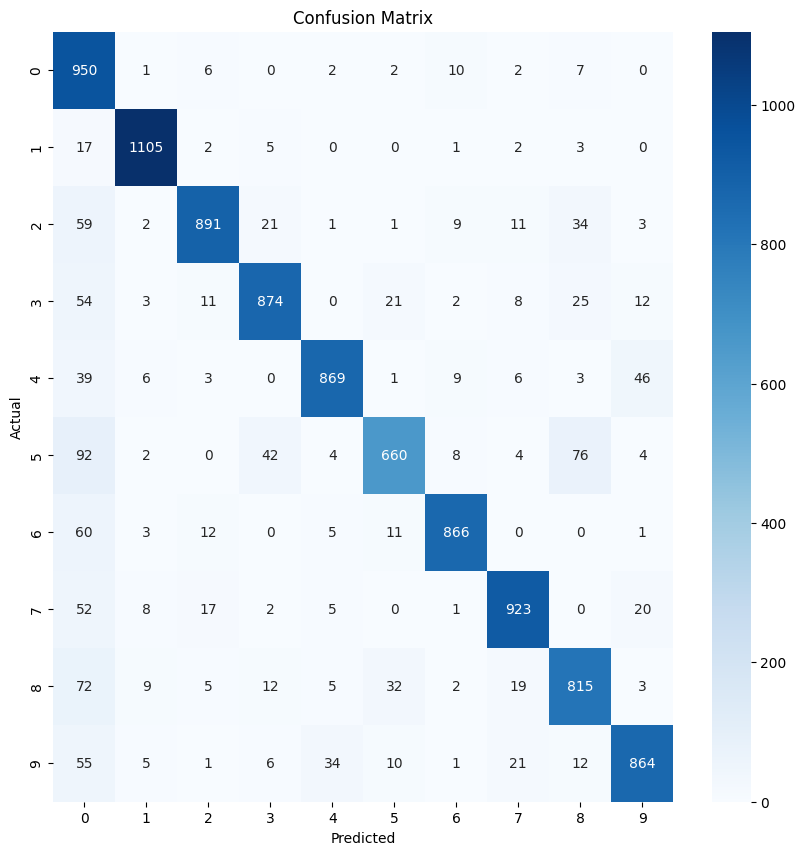

In [10]:
y_test_true = np.argmax(y_test, axis=1)
rounded_predictions = np.round(predictions)
y_test_pred = np.argmax(rounded_predictions, axis=1)
classes = [str(i) for i in range(10)]
plot_confusion_matrix(y_test_true, y_test_pred, classes)

In [11]:
print_classification_report(y_test_true, y_test_pred, classes)

              precision    recall  f1-score   support

           0       0.66      0.97      0.78       980
           1       0.97      0.97      0.97      1135
           2       0.94      0.86      0.90      1032
           3       0.91      0.87      0.89      1010
           4       0.94      0.88      0.91       982
           5       0.89      0.74      0.81       892
           6       0.95      0.90      0.93       958
           7       0.93      0.90      0.91      1028
           8       0.84      0.84      0.84       974
           9       0.91      0.86      0.88      1009

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



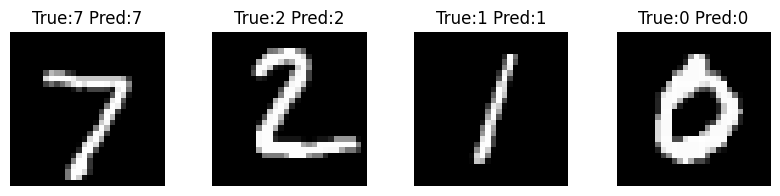

In [13]:
pred_plot(X_test,y_test_true,y_test_pred)